# Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
logDirPath = os.path.join('..', 'logs', 'OMlogs')
logFiles = [fileOrDir for fileOrDir in os.listdir(logDirPath) if fileOrDir.endswith(".log")]

def parseEvent(line):
    timestampEvent = line.split(' ')
    timestamp, rawEvent = timestampEvent[0][1:], timestampEvent[1][:-2]
    bracketIndex = rawEvent.index('(')
    eventType, rawEventParameters = rawEvent[:bracketIndex], rawEvent[bracketIndex + 1:]
    eventParameterArray = rawEventParameters.split(',')
    eventParameters = {'parameter' + str(index): value for index, value in enumerate(eventParameterArray)}
    return {
        'timestamp': timestamp,
        'type': eventType,
        **eventParameters
    }

def parseEventFile(logFilePath):
    events = []
    logFile = open(logDirPath + '/' + logFilePath, 'r')
    for line in logFile:
        events.append(parseEvent(line))
    logFile.close()
    return events

def parseEventFiles():
    events = []
    for logFilePath in logFiles:
        events += parseEventFile(logFilePath)
    return events

In [3]:
events = pd.DataFrame(parseEventFiles())
events.head()

,parameter0,parameter1,timestamp,type
0,1,NaN,0,patient
1,3,NaN,0,patient
2,4,NaN,0,patient
3,5,NaN,0,patient
4,6,NaN,0,patient


In [44]:
eventByType = events.groupby('type')

In [45]:
def labelBars(plot):
    for p in plot.patches:
        plot.annotate(
            np.round(p.get_height(), decimals=2),
            (
                p.get_x() + p.get_width() / 2.,
                p.get_height()
            ),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points'
     )

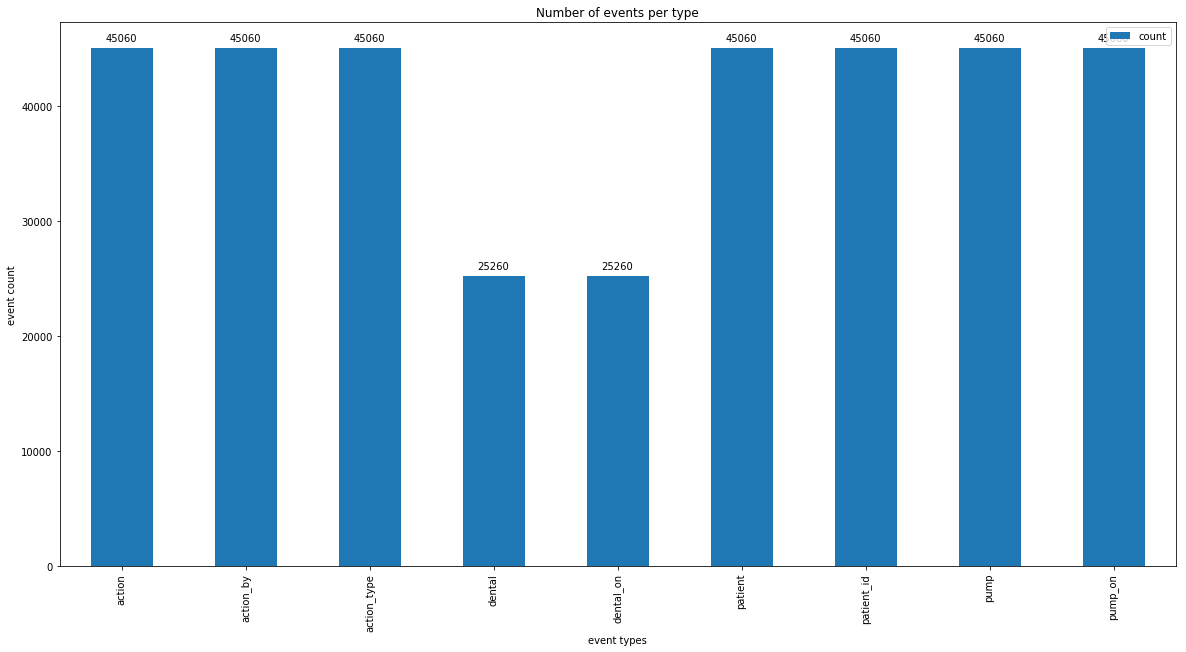

In [51]:
eventTypeCount = eventByType['type'].agg(['count'])
eventTypePlot = eventTypeCount.plot(
    kind='bar',
    figsize=(20, 10)
)
eventTypePlot.set(
    xlabel='event types',
    ylabel='event count',
    title='Number of events per type'
)
labelBars(eventTypePlot)

In [42]:
for eventType in eventByType.groups.keys():
    print(eventType)
    print()
    print(eventByType.get_group(eventType).describe())
    print()

action

       parameter0  parameter1 timestamp    type
count       45060         0.0     45060   45060
unique      10010         0.0     35011       1
top           452         NaN   5748472  action
freq            9         NaN         4   45060

action_by

       parameter0 parameter1 timestamp       type
count       45060      45060     45060      45060
unique      10010      10010     35011          1
top           452        452   5748472  action_by
freq            9          9         4      45060

action_type

       parameter0   parameter1 timestamp         type
count       45060        45060     45060        45060
unique      10010            2     35011            1
top           452  antibiotics   5748472  action_type
freq            9        25260         4        45060

dental

       parameter0  parameter1 timestamp    type
count       25260         0.0     25260   25260
unique      10010         0.0     15134       1
top            66         NaN   4783141  dental
freq 

In [57]:
print('Unique parameter1 for action_type')
list(eventByType.get_group('action_type')['parameter1'].unique())

Unique parameter1 for action_type


['noise', 'antibiotics']

In [58]:
print('Unique parameter1 for patient_id')
list(eventByType.get_group('patient_id')['parameter1'].unique())

Unique parameter1 for patient_id


['Alice', 'Bob', 'Charlie']